<h1> Importing libararies

In [209]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-in-london/housing_in_london_monthly_variables.csv
/kaggle/input/housing-in-london/housing_in_london_yearly_variables.csv


<h1> Reading Data

In [210]:
df=pd.read_csv('/kaggle/input/housing-in-london/housing_in_london_monthly_variables.csv')

<h1>Data exploratory and analysis

In [211]:
df.head() #be default it shows first 5 rows

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [212]:
df.shape #(rows,cols)

(13549, 7)

<h3>Checking NULL values

In [213]:
df.info()  #from it we can know 1>>Shape, 2>>Dtat Types ,3>>NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [214]:
df.isnull().sum() #calcalute count of NULL values for each column

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [215]:
#or
df.count() #shows count of not null values

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
borough_flag     13549
dtype: int64

##### we can observe that 'houses_sold' , 'no_of_crimes' have Null values

### 'no_of_crimes' col (Number of crimes committed)

In [216]:
df['no_of_crimes']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13544   NaN
13545   NaN
13546   NaN
13547   NaN
13548   NaN
Name: no_of_crimes, Length: 13549, dtype: float64

In [217]:
print("There are ", df['no_of_crimes'].isnull().sum() , "Null values in 'no_of_crimes' col")

There are  6110 Null values in 'no_of_crimes' col


##### NULL values here may be referd to 'unkown' so we can fill it with 0

In [218]:
df['no_of_crimes'].fillna(0,inplace=True)
#df['no_of_crimes']=df['no_of_crimes'].fillna(0)#another way to save Changes
df['no_of_crimes']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13544    0.0
13545    0.0
13546    0.0
13547    0.0
13548    0.0
Name: no_of_crimes, Length: 13549, dtype: float64

In [219]:
df['no_of_crimes'].isnull().sum() # Done

0

### 'houses_sold' col  (Number of houses sold)

In [220]:
df['houses_sold']

0           17.0
1            7.0
2           14.0
3            7.0
4           10.0
          ...   
13544    64605.0
13545    68677.0
13546    67814.0
13547        NaN
13548        NaN
Name: houses_sold, Length: 13549, dtype: float64

In [221]:
print("There are ",df['houses_sold'].isnull().sum(), " Null values in 'no_of_crimes' col")

There are  94  Null values in 'no_of_crimes' col


##### NULL values  may be reperced to  AVG value of its col

In [222]:
df['houses_sold'].fillna(df['houses_sold'].mean(),inplace=True)
#df['houses_sold']=df['houses_sold'].fillna(df['houses_sold'].mean())  #another way to save Changes
df['houses_sold']

0           17.000000
1            7.000000
2           14.000000
3            7.000000
4           10.000000
             ...     
13544    64605.000000
13545    68677.000000
13546    67814.000000
13547     3893.994129
13548     3893.994129
Name: houses_sold, Length: 13549, dtype: float64

In [223]:
df['houses_sold'].isnull().sum() #Done

0

In [224]:
df.isnull().sum() #NO NULL values 

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

### Chaecking Data Types

In [225]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,0.0,1
1,1995-02-01,city of london,82203,E09000001,7.0,0.0,1


df.dtypes

<h5>Date has to had a date type rather than object

In [226]:
df['date']=pd.to_datetime(df['date'])
df['date']

0       1995-01-01
1       1995-02-01
2       1995-03-01
3       1995-04-01
4       1995-05-01
           ...    
13544   2019-09-01
13545   2019-10-01
13546   2019-11-01
13547   2019-12-01
13548   2020-01-01
Name: date, Length: 13549, dtype: datetime64[ns]

In [227]:
df['no_of_crimes']=df['no_of_crimes'].astype(int)
df['no_of_crimes']

0        0
1        0
2        0
3        0
4        0
        ..
13544    0
13545    0
13546    0
13547    0
13548    0
Name: no_of_crimes, Length: 13549, dtype: int64

In [228]:
df.dtypes# 'date' , 'no_of_crimes' >>Done

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes              int64
borough_flag              int64
dtype: object

<h3>Add a new column 'Year' >>contains Years only

In [229]:
df['Years']=df['date'].dt.year
df['Years']  

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13544    2019
13545    2019
13546    2019
13547    2019
13548    2020
Name: Years, Length: 13549, dtype: int32

In [230]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,Years
0,1995-01-01,city of london,91449,E09000001,17.0,0,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,0,1,1995
2,1995-03-01,city of london,79121,E09000001,14.0,0,1,1995
3,1995-04-01,city of london,77101,E09000001,7.0,0,1,1995
4,1995-05-01,city of london,84409,E09000001,10.0,0,1,1995


In [231]:
df.shape #no of columns increased by one

(13549, 8)

<H2>Questions

<h3>Q )show all records where no of crimes is 0 and how many such records are there?

In [232]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag', 'Years'],
      dtype='object')

In [233]:
df['no_of_crimes']==0

0        True
1        True
2        True
3        True
4        True
         ... 
13544    True
13545    True
13546    True
13547    True
13548    True
Name: no_of_crimes, Length: 13549, dtype: bool

In [234]:
df[df['no_of_crimes']==0]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,Years
0,1995-01-01,city of london,91449,E09000001,17.000000,0,1,1995
1,1995-02-01,city of london,82203,E09000001,7.000000,0,1,1995
2,1995-03-01,city of london,79121,E09000001,14.000000,0,1,1995
3,1995-04-01,city of london,77101,E09000001,7.000000,0,1,1995
4,1995-05-01,city of london,84409,E09000001,10.000000,0,1,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.000000,0,0,2019
13545,2019-10-01,england,249376,E92000001,68677.000000,0,0,2019
13546,2019-11-01,england,248515,E92000001,67814.000000,0,0,2019
13547,2019-12-01,england,250410,E92000001,3893.994129,0,0,2019


In [235]:
#len(df[df['no_of_crimes']==0])
print("Zero Crimes are ocuured in",len(df[df['no_of_crimes']==0]),'row' )

Zero Crimes are ocuured in 6214 row


In [236]:
df[df['no_of_crimes']==0].shape[0] #another way

6214

<h3>Q ) MAX,MIN ,AVG , 'average_price' per Year Where area in england

In [237]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag', 'Years'],
      dtype='object')

In [238]:
df['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [239]:
df['area']=='england'

0        False
1        False
2        False
3        False
4        False
         ...  
13544     True
13545     True
13546     True
13547     True
13548     True
Name: area, Length: 13549, dtype: bool

In [240]:
df_temp=df[df['area']=='england']
df_temp

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,Years
13248,1995-01-01,england,53203,E92000001,47639.000000,0,0,1995
13249,1995-02-01,england,53096,E92000001,47880.000000,0,0,1995
13250,1995-03-01,england,53201,E92000001,67025.000000,0,0,1995
13251,1995-04-01,england,53591,E92000001,56925.000000,0,0,1995
13252,1995-05-01,england,53678,E92000001,64192.000000,0,0,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.000000,0,0,2019
13545,2019-10-01,england,249376,E92000001,68677.000000,0,0,2019
13546,2019-11-01,england,248515,E92000001,67814.000000,0,0,2019
13547,2019-12-01,england,250410,E92000001,3893.994129,0,0,2019


In [241]:
df_temp.groupby('Years')['average_price'].min() #min val for each year in england

Years
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

In [242]:
df_temp.groupby('Years')['average_price'].max() #max val for each year in england

Years
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [243]:
df_temp.groupby('Years')['average_price'].mean() #avg val for each year in england

Years
1995     53322.416667
1996     54151.500000
1997     59160.666667
1998     64301.666667
1999     70070.750000
2000     80814.333333
2001     90306.750000
2002    107981.500000
2003    130218.583333
2004    152314.416667
2005    163570.000000
2006    174351.500000
2007    190025.583333
2008    182379.916667
2009    166558.666667
2010    177472.666667
2011    175230.000000
2012    177488.000000
2013    182581.416667
2014    197771.083333
2015    211174.750000
2016    227337.166667
2017    238161.166667
2018    245018.333333
2019    247101.083333
2020    247355.000000
Name: average_price, dtype: float64

<h3>Q ) MAX ,MIN ,AVG no of  'no_of_crimes that recorder per area

In [244]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag', 'Years'],
      dtype='object')

In [245]:
df.groupby('area')['no_of_crimes'].max().sort_values(ascending=False)

area
westminster               7461
lambeth                   4701
camden                    4558
southwark                 3821
newham                    3668
hackney                   3466
ealing                    3401
islington                 3384
tower hamlets             3316
croydon                   3263
haringey                  3199
wandsworth                3051
waltham forest            2941
brent                     2937
barnet                    2893
greenwich                 2853
hillingdon                2819
hounslow                  2817
lewisham                  2813
enfield                   2798
kensington and chelsea    2778
hammersmith and fulham    2645
bromley                   2637
redbridge                 2560
barking and dagenham      2049
havering                  1956
bexley                    1914
harrow                    1763
merton                    1623
richmond upon thames      1551
sutton                    1425
kingston upon thames      1379
cit

In [246]:
df.groupby('area')['no_of_crimes'].min().sort_values(ascending=False)

area
barking and dagenham      0
kensington and chelsea    0
lambeth                   0
lewisham                  0
london                    0
merton                    0
newham                    0
north east                0
north west                0
outer london              0
redbridge                 0
richmond upon thames      0
south east                0
south west                0
southwark                 0
sutton                    0
tower hamlets             0
waltham forest            0
wandsworth                0
west midlands             0
westminster               0
kingston upon thames      0
islington                 0
barnet                    0
inner london              0
bexley                    0
brent                     0
bromley                   0
camden                    0
city of london            0
croydon                   0
ealing                    0
east midlands             0
east of england           0
enfield                   0
england        

In [247]:
df.groupby('area')['no_of_crimes'].mean().sort_values(ascending=False)

area
westminster               4025.724252
lambeth                   2390.212625
camden                    2325.431894
southwark                 2304.122924
newham                    2169.362126
croydon                   2018.352159
ealing                    1983.445183
hackney                   1953.135762
tower hamlets             1927.735099
islington                 1914.159468
brent                     1837.784053
haringey                  1830.803987
lewisham                  1747.139535
barnet                    1733.431894
wandsworth                1681.146179
greenwich                 1639.441860
hillingdon                1629.451827
waltham forest            1608.019934
enfield                   1575.642384
hounslow                  1552.202658
bromley                   1536.910299
redbridge                 1476.312292
hammersmith and fulham    1456.681063
kensington and chelsea    1394.710963
barking and dagenham      1216.724252
havering                  1164.292359
bexley 

<h3>Q )Total count of records of each area where 'avg price ' is less than 100000

In [248]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag', 'Years'],
      dtype='object')

In [249]:
df['average_price']<100000

0         True
1         True
2         True
3         True
4         True
         ...  
13544    False
13545    False
13546    False
13547    False
13548    False
Name: average_price, Length: 13549, dtype: bool

In [250]:
df[df['average_price']<100000]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,Years
0,1995-01-01,city of london,91449,E09000001,17.0,0,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,0,1,1995
2,1995-03-01,city of london,79121,E09000001,14.0,0,1,1995
3,1995-04-01,city of london,77101,E09000001,7.0,0,1,1995
4,1995-05-01,city of london,84409,E09000001,10.0,0,1,1995
...,...,...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,0,0,2001
13331,2001-12-01,england,95992,E92000001,93329.0,0,0,2001
13332,2002-01-01,england,96215,E92000001,71678.0,0,0,2002
13333,2002-02-01,england,96676,E92000001,77131.0,0,0,2002


In [251]:
df[df['average_price']<100000]['area'].value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow         

In [252]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes              int64
borough_flag              int64
Years                     int32
dtype: object

In [253]:
df['Years']=df['Years'].astype(object)

In [254]:
df['Years']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13544    2019
13545    2019
13546    2019
13547    2019
13548    2020
Name: Years, Length: 13549, dtype: object

<h1>Visualizations 

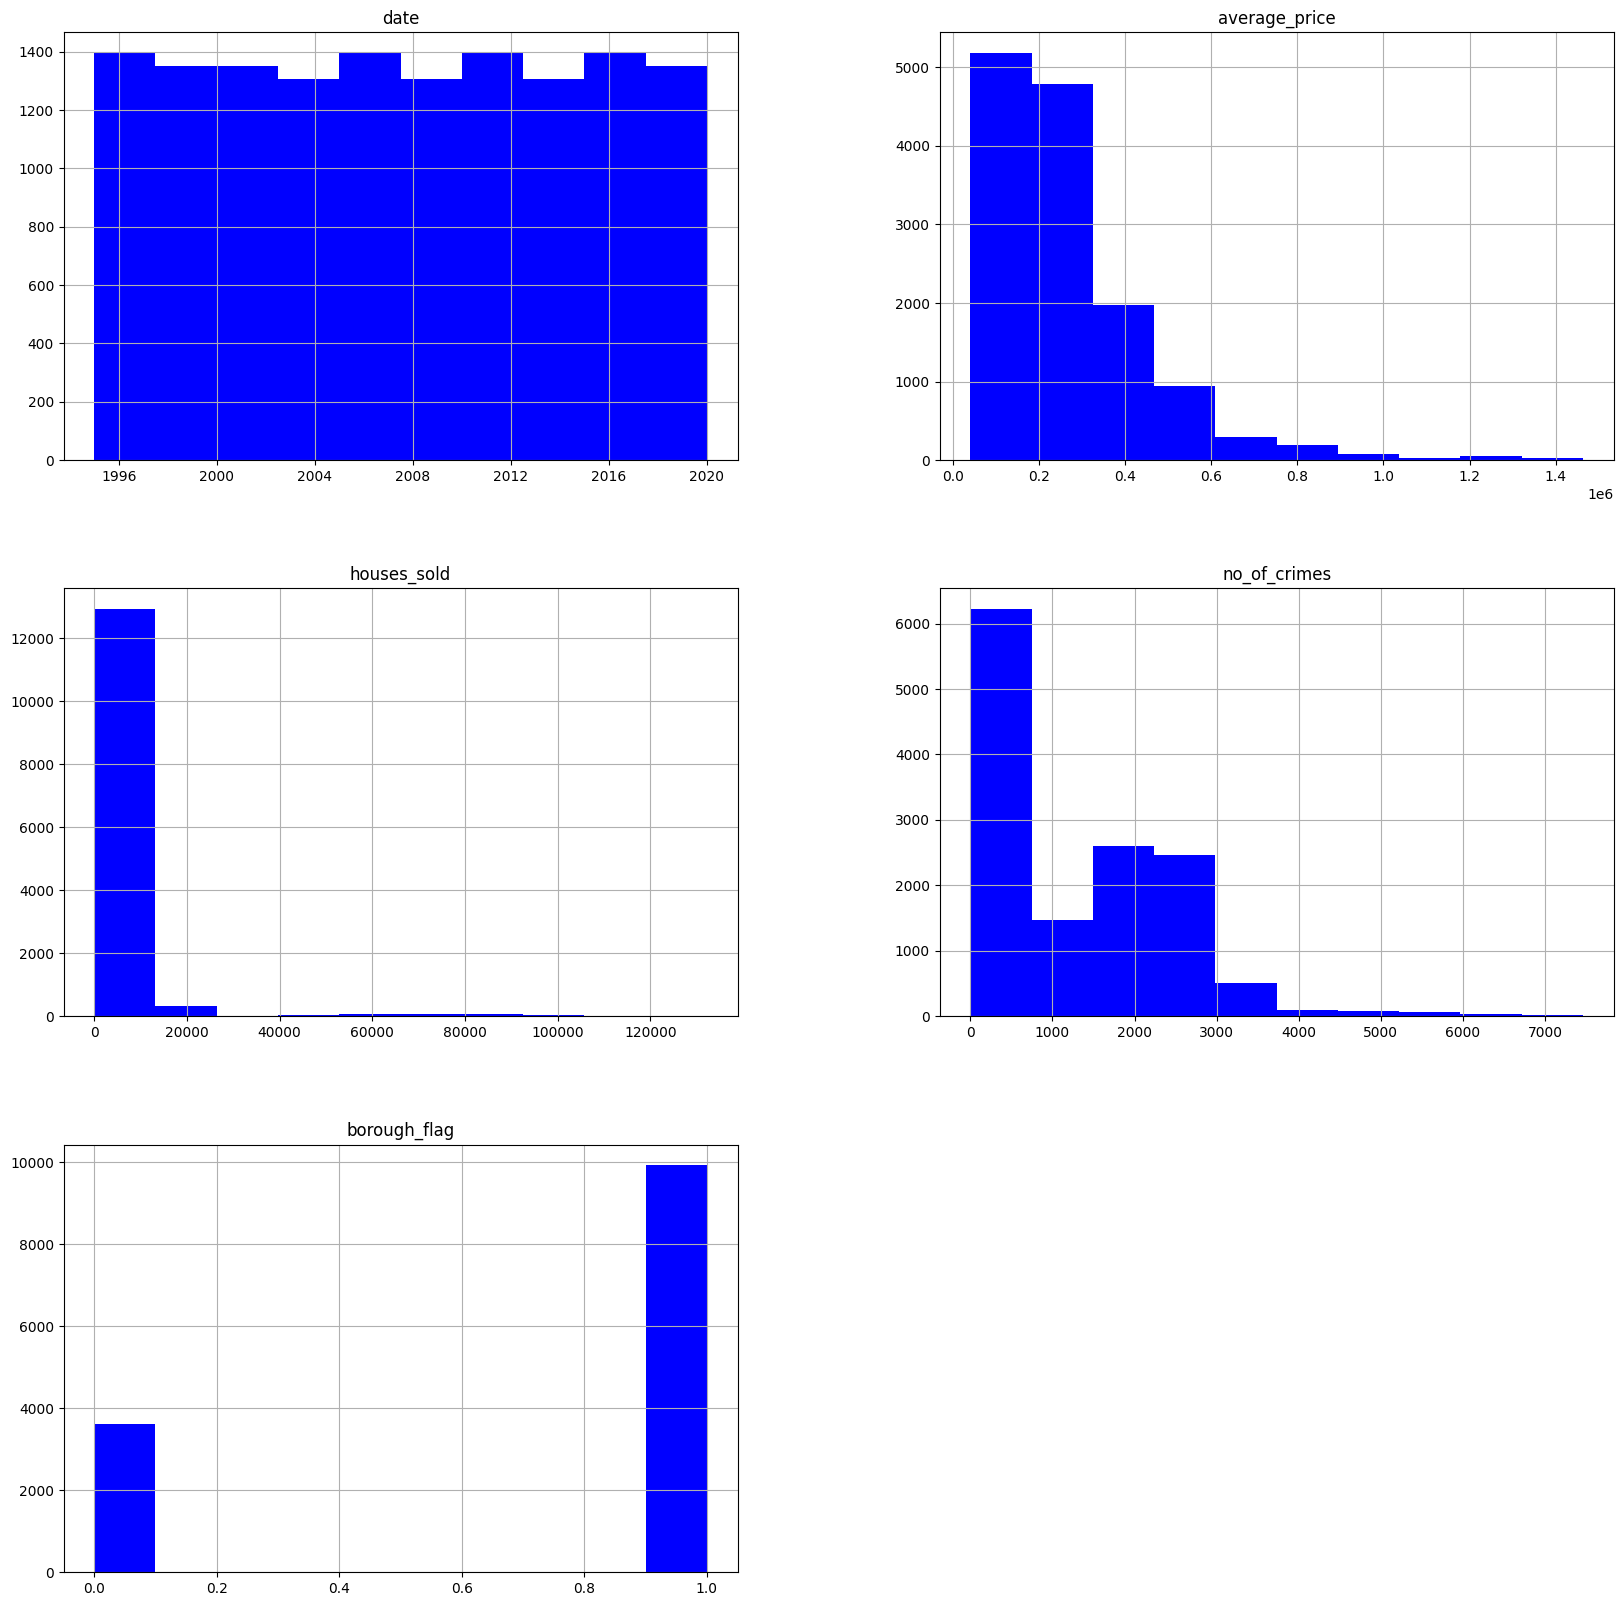

In [255]:
df.hist(figsize=(20,20),color='blue')  # Visualizations distribution columns that have a data type "Number "
plt.show()

In [256]:
df['Years'].value_counts()  #It's obvious that the number of homes sold in most years is similar ~ 540

Years
1998    542
1996    542
1995    540
2009    540
2019    540
2018    540
2017    540
2016    540
2015    540
2014    540
2013    540
2012    540
2011    540
2010    540
2008    540
2007    540
2006    540
2005    540
2004    540
2003    540
2002    540
2001    540
2000    540
1999    540
1997    540
2020     45
Name: count, dtype: int64

####It's obvious that the number of homes sold in most years is similar ~ 540

In [257]:
df['Years'].value_counts().mode() #most freq count for Years

0    540
Name: count, dtype: int64

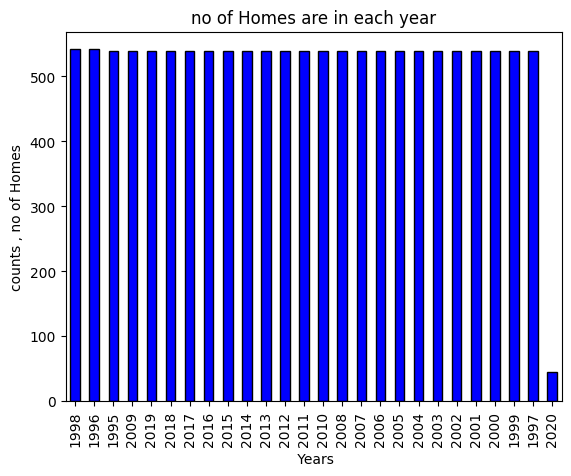

In [258]:
df['Years'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title('no of Homes are in each year')
plt.xlabel(' Years')
plt.ylabel('counts , no of Homes')
plt.show()

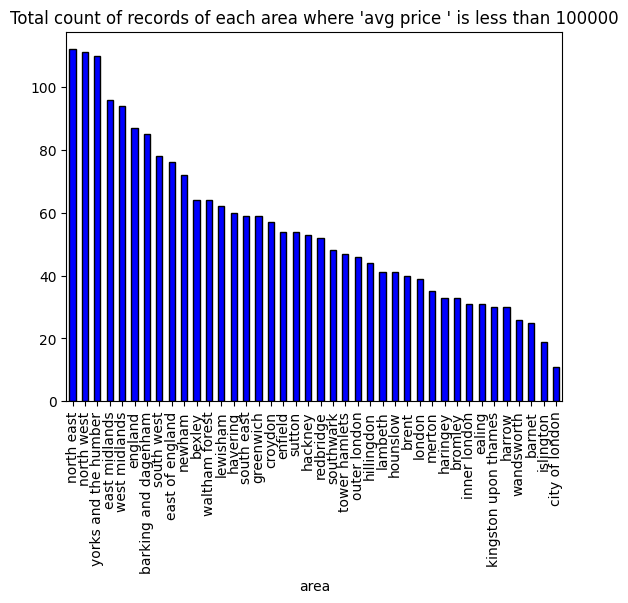

In [259]:
df[df['average_price']<100000]['area'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title("Total count of records of each area where 'avg price ' is less than 100000" )
plt.show()

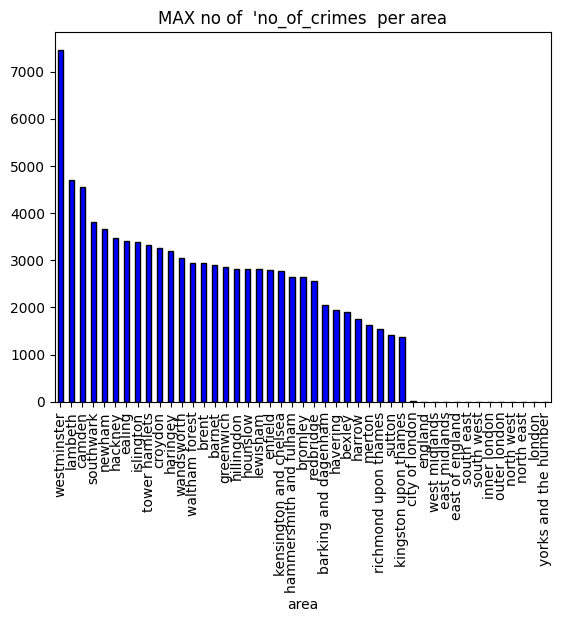

In [260]:
df.groupby('area')['no_of_crimes'].max().sort_values(ascending=False).plot(kind='bar', color='blue', edgecolor='black')
plt.title("MAX no of  'no_of_crimes  per area")

plt.show()

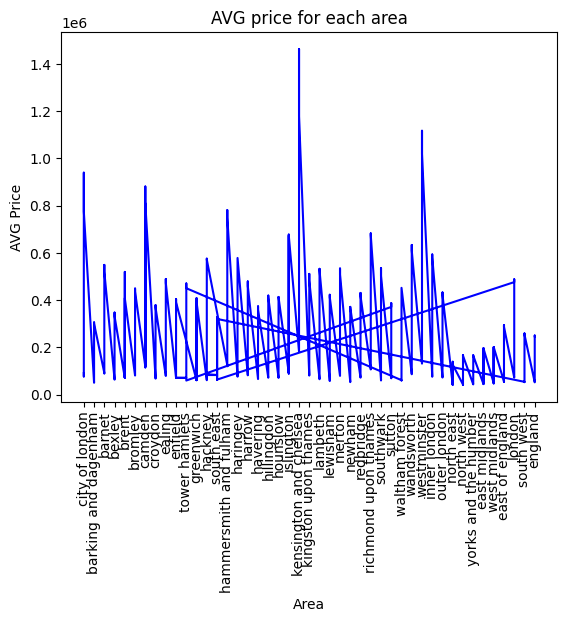

In [261]:
plt.plot(df['area'],df['average_price'],color='blue')
plt.title('AVG price for each area')
plt.xlabel('Area')
plt.ylabel('AVG Price')
plt.xticks(rotation=90)
plt.show()

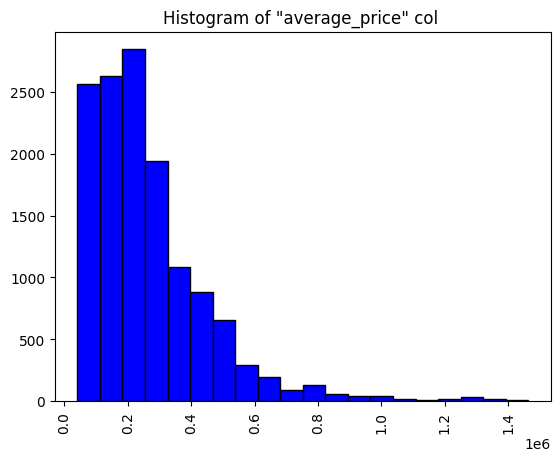

In [262]:
plt.hist(df['average_price'], bins=20, color='blue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Histogram of "average_price" col ')
plt.show()


<h5>Flag to indicate if the area is a borough of London

In [263]:
df['borough_flag'].value_counts() #Flag to indicate if the area is a borough of London

borough_flag
1    9936
0    3613
Name: count, dtype: int64

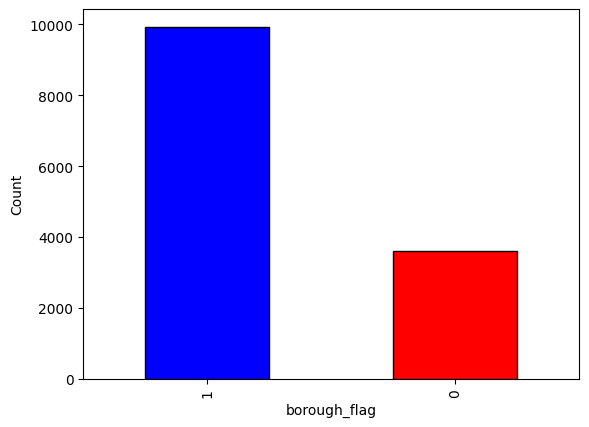

In [264]:
gender_counts = df['borough_flag'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'red'], edgecolor='black')
plt.xlabel('borough_flag')
plt.ylabel('Count')
plt.show()

<h1>_____________________________________________________________________

<h1>Wish yoy Luck
<h3>Esraa Meslam